In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb  9 01:47:27 2019

@author: avaca
"""

from sklearn.mixture import GaussianMixture

import pandas as pd

import numpy as np

data = pd.read_csv('transformados03.csv')

target = data['TARGET']

data.drop('TARGET', axis = 1, inplace = True)

In [11]:
def get_clusters(X, components):
        
    bic = 1000000
    
    comp = 0
    
    models = {}
    
    for i in range(1, components):
        
        model = GaussianMixture(i, covariance_type = 'full', random_state = 100).fit(X)
        
        bic_model = model.bic(X)
        
        models[str(i)+'_model'] = bic_model
        
        if bic_model < bic:
            
            comp = components
            
            bic = bic_model
        
        else:
            
            next
    
    best_model = {str(comp) + 'components_bic': bic}
    
    return best_model, models

In [12]:
best, models = get_clusters(data, 10)

In [13]:
best

{'10components_bic': -6537844.750711037}

In [14]:
models

{'1_model': -3373345.3481175858,
 '2_model': -3891580.5524868923,
 '3_model': -5106409.012113442,
 '4_model': -5435132.23810037,
 '5_model': -6189190.640830621,
 '6_model': -6387075.388339157,
 '7_model': -6537844.750711037,
 '8_model': -6217484.157171271,
 '9_model': -6421330.390586983}

In [17]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [18]:
models[str(7)+'_model'] = best['7components_bic'][0]



IndexError: invalid index to scalar variable.

In [19]:
bics = list(models.values())

In [16]:
plt.plot(num, bics, label = 'BIC')

NameError: name 'plt' is not defined

In [60]:
GaussianMixture(15, covariance_type = 'full', random_state = 7).fit(data).bic(data)

-4802689.000158407

In [63]:
clusters = GaussianMixture(20, covariance_type = 'full', random_state = 7).fit(data).predict(data)

In [66]:
data['cluster'] = clusters

In [92]:
#data['TARGET'] = np.exp(target) + 1


In [93]:
a = data[['cluster', 'TARGET']]

grouped = a.groupby('cluster').mean()

In [94]:
grouped.dtypes

TARGET    float64
dtype: object

In [100]:
plt.rcParams['figure.figsize'] = (12, 12)

In [105]:
#plt.rcParams.keys()

pd.set_option('display.max_columns', 200)

In [106]:
data.groupby('cluster').describe()

HY_antiguedad                                               \
                count      mean       std  min  25%  50%  75%  max   
cluster                                                              
0               461.0  0.206074  0.404923  0.0  0.0  0.0  0.0  1.0   
1               539.0  0.230056  0.421259  0.0  0.0  0.0  0.0  1.0   
2               115.0  0.895652  0.307049  0.0  1.0  1.0  1.0  1.0   
3               327.0  0.706422  0.456099  0.0  0.0  1.0  1.0  1.0   
4               543.0  0.530387  0.499536  0.0  0.0  1.0  1.0  1.0   
5                80.0  0.475000  0.502525  0.0  0.0  0.0  1.0  1.0   
6               667.0  0.773613  0.418806  0.0  1.0  1.0  1.0  1.0   
7               307.0  0.534202  0.499643  0.0  0.0  1.0  1.0  1.0   
8               324.0  0.509259  0.500688  0.0  0.0  1.0  1.0  1.0   
9               453.0  0.856512  0.350957  0.0  1.0  1.0  1.0  1.0   
10              209.0  0.392344  0.489445  0.0  0.0  0.0  1.0  1.0   
11              454.0  0.350220  0.477565  0.0  0.0  0.0  1.0  1.0   
12              146.0  0.452055  0.499409  0.0  0.0  0.0  1.0  1.0   
13              191.0  0.146597  0.354633  0.0  0.0  0.0  0.0  1.0   
14              103.0  0.048544  0.215963  0.0  0.0  0.0  0.0  1.0   
15              669.0  0.657698  0.474835  0.0  0.0  1.0  1.0  1.0   
16              152.0  0.059211  0.236799  0.0  0.0  0.0  0.0  1.0   
17              171.0  0.017544  0.131672  0.0  0.0  0.0  0.0  1.0   
18              477.0  0.551363  0.497877  0.0  0.0  1.0  1.0  1.0   
19              409.0  0.562347  0.496705  0.0  0.0  1.0  1.0  1.0   

        HY_metros_totales                                              \
                    count      mean       std           min       25%   
cluster                                                                 
0                   461.0  0.000066  0.000090  2.087912e-05  0.000041   
1                   539.0  0.000067  0.000086  1.912088e-05  0.000042   
2                   115.0  0.000065  0.000065  2.126374e-05  0.000038   
3                   327.0  0.000025  0.000109  1.291209e-06  0.000012   
4                   543.0  0.000021  0.000022  2.582418e-06  0.000012   
5                    80.0  0.000013  0.000004  7.417582e-07  0.000013   
6                   667.0  0.000069  0.000218  2.123626e-05  0.000041   
7                   307.0  0.000095  0.000090  1.043956e-05  0.000051   
8                   324.0  0.000034  0.000306  1.098901e-06  0.000012   
9                   453.0  0.000054  0.000034  1.945055e-05  0.000040   
10                  209.0  0.000090  0.000110  1.648352e-06  0.000024   
11                  454.0  0.000094  0.000368  1.538462e-05  0.000044   
12                  146.0  0.001449  0.009439  2.747253e-06  0.000016   
13                  191.0  0.000177  0.000631  3.791209e-06  0.000046   
14                  103.0  0.002203  0.010383  1.153846e-05  0.000061   
15                  669.0  0.000033  0.000300  1.538462e-06  0.000010   
16                  152.0  0.001488  0.007489  2.881868e-05  0.000137   
17                  171.0  0.001967  0.016463  2.994505e-06  0.000054   
18                  477.0  0.000115  0.000130  8.186813e-06  0.000051   
19                  409.0  0.000074  0.000278  2.084066e-05  0.000041   

                                      HY_num_banos                           \
              50%       75%       max        count      mean       std  min   
cluster                                                                       
0        0.000049  0.000058  0.000549        461.0  0.222614  0.118945  0.0   
1        0.000052  0.000061  0.000549        539.0  0.245638  0.112004  0.0   
2        0.000047  0.000060  0.000549        115.0  0.273136  0.079275  0.0   
3        0.000014  0.000015  0.001786        327.0  0.003311  0.034457  0.0   
4        0.000014  0.000018  0.000219        543.0  0.000000  0.000000  0.0   
5        0.000013  0.000015  0.000024         80.0  0.000000  0.000000  0.0   
6     

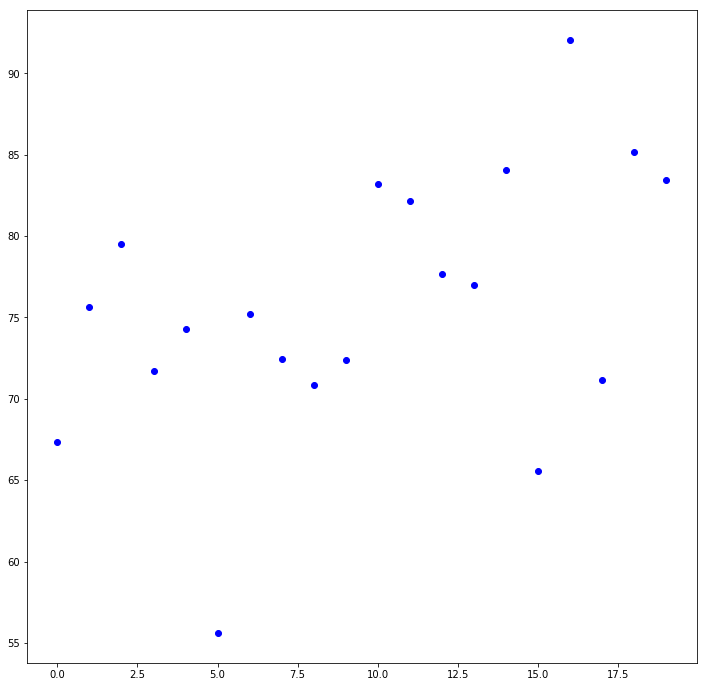

In [102]:
plt.plot(grouped.index, grouped['TARGET'], 'bo')

In [53]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(0.99, whiten = True)

In [56]:
data1 = pca.fit_transform(data)

In [57]:
data1.shape

(6797, 45)

In [58]:
data.shape

(6797, 100)

Almost 50% reduction of dimensions with almost no information lost.  

In [110]:
pd.DataFrame(data1).to_csv('pcadf.csv', sep = ',', encoding = 'utf-8')

In [111]:
#pd.to_csv('pcadf.csv', sep = ',', encoding = 'utf-8')

In [ ]:
from sklearn.cluster import FeatureAgglomeration

In [115]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
from sklearn.metrics import silhouette_score

In [129]:
def hierarchical(X, cluster_n):
    
    silhouette = 0
    
    best_cluster = {}
    
    best = 0
    
    clusters = {}
    
    for i in range(2, cluster_n):
        
        model_labels = AgglomerativeClustering(n_clusters = i).fit_predict(X)
        
        silhouette_avg = silhouette_score(X, model_labels)
        
        clusters[str(i)+'_hier_clust'] = silhouette_avg
        
        if silhouette_avg > silhouette:
            
            silhouette = silhouette_avg
            
            best = i
            
    best_cluster[str(best)+'hier_clust'] = silhouette
    
    return best_cluster, clusters

In [130]:
best_hier, clusters_hier = hierarchical(data, 20)

In [131]:
best_hier

{'2hier_clust': 0.44820964389884965}

In [132]:
clusters_hier

{'2_hier_clust': 0.44820964389884965,
 '3_hier_clust': 0.2092946662943971,
 '4_hier_clust': 0.21081340684069771,
 '5_hier_clust': 0.18190516690017325,
 '6_hier_clust': 0.17998467497730278,
 '7_hier_clust': 0.1049907115909862,
 '8_hier_clust': 0.0944068901650857,
 '9_hier_clust': 0.10395595221567307,
 '10_hier_clust': 0.10978456912593584,
 '11_hier_clust': 0.11140195503992752,
 '12_hier_clust': 0.11812409139986968,
 '13_hier_clust': 0.11824265308779403,
 '14_hier_clust': 0.10515792704932811,
 '15_hier_clust': 0.10928828037023823,
 '16_hier_clust': 0.11370420542042109,
 '17_hier_clust': 0.10919808909970398,
 '18_hier_clust': 0.11137224360000048,
 '19_hier_clust': 0.11317344512678484}

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor(n_estimators = 600, criterion = 'mse')

In [133]:
data['cluster'] = AgglomerativeClustering(n_clusters = 2).fit_predict(data)

In [134]:
data2 = data

data2['TARGET'] = target

In [161]:
Xt1 = data2[data2['cluster'] == 1].drop(['TARGET', 'cluster'], axis = 1)

Xt2 = data2[data2['cluster'] == 0].drop(['TARGET', 'cluster'], axis = 1)

yt1 = data2[data2['cluster'] == 1].drop('cluster', axis = 1)['TARGET']

yt2 = data2[data2['cluster'] == 0].drop('cluster', axis = 1)['TARGET']

In [163]:
Xt1

,HY_antiguedad,HY_metros_totales,HY_num_banos,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,HY_precio_anterior,IDEA_pc_industria,IDEA_pc_oficina,IDEA_pc_otros,IDEA_ind_tienda,IDEA_ind_riqueza,IDEA_rent_alquiler,IDEA_ind_liquidez,IDEA_unitprice_sale_residential,IDEA_price_sale_residential,IDEA_stock_sale_residential,IDEA_demand_sale_residential,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,img_count,precio_metros,HY_provincia_,HY_provincia_A.Coruña,HY_provincia_Albacete,HY_provincia_Alicante,HY_provincia_Almería,HY_provincia_Asturias,HY_provincia_Avila,HY_provincia_Badajoz,HY_provincia_Baleares,HY_provincia_Barcelona,HY_provincia_Burgos,HY_provincia_Cáceres,HY_provincia_Cádiz,HY_provincia_Castellón,HY_provincia_Ciudad.Real,HY_provincia_Córdoba,HY_provincia_Cuenca,HY_provincia_Gerona,HY_provincia_Granada,HY_provincia_Guadalajara,HY_provincia_Huelva,HY_provincia_Huesca,HY_provincia_Jaén,HY_provincia_La.Rioja,HY_provincia_Las.Palmas,HY_provincia_León,HY_provincia_Lérida,HY_provincia_Madrid,HY_provincia_Málaga,HY_provincia_Murcia,HY_provincia_Navarra,HY_provincia_Palencia,HY_provincia_Pontevedra,HY_provincia_Segovia,HY_provincia_Sevilla,HY_provincia_Soria,HY_provincia_Tarragona,HY_provincia_Tenerife,HY_provincia_Teruel,HY_provincia_Toledo,HY_provincia_Valencia,HY_provincia_Valladolid,HY_provincia_Zaragoza,HY_tipo_Almacén,HY_tipo_Aparcamiento,HY_tipo_Ático,HY_tipo_Casa.de.pueblo,HY_tipo_Chalet.adosado,HY_tipo_Chalet.independiente,HY_tipo_Chalet.pareado,HY_tipo_Dúplex,HY_tipo_Edificio.comercial,HY_tipo_Edificio.turístico,HY_tipo_Garaje,HY_tipo_Local,HY_tipo_Nave.adosada,HY_tipo_Nave.aislada,HY_tipo_Oficina,HY_tipo_Otro,HY_tipo_Piso,HY_tipo_Solar,HY_tipo_Suelo.rústico.no.urbanizable,HY_tipo_Trastero,HY_cert_energ_B,HY_cert_energ_C,HY_cert_energ_D,HY_cert_energ_E,HY_cert_energ_F,HY_cert_energ_G
25,1,0.000044,0.227670,0,1,0,0,0.667640,0.001725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000876,0.1000,0.1000,0.434783,0.913043,1.0,0.026260,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
26,1,0.000044,0.227670,0,1,0,0,0.681859,0.002170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.0000,0.1000,0.413043,0.869565,1.0,0.026670,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
54,1,0.000027,0.000000,0,0,0,0,0.566218,0.000318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.1429,0.1429,0.478261,0.891304,0.2,0.036836,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
55,1,0.000020,0.000000,0,0,0,0,0.559990,0.000285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000146,0.0000,0.5000,0.543478,0.695652,0.2,0.048598,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
56,1,0.000019,0.000000,0,0,0,0,0.557007,0.000272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000219,0.0000,0.0000,0.630435,0.739130,0.2,0.050797,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
57,1,0.000012,0.000000,0,0,0,0,0.529581,0.000175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000146,0.0000,0.0000,0.891304,0.913043,0.2,0.075247,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
58,1,0.000024,0.000000,0,0,0,0,0.570048,0.000337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000073,0.0000,0.0000,0.630435,0.630435,0.2,0.041874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82,1,0.000065,0.360849,0,1,0,0,0.669777,0.001790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.023507,0.1905,0.1043,0.869565,1.000000,1.

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xt1, yt1, 
                                                        test_size = 0.1,
                                                        random_state = 7)

In [166]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xt2, yt2, 
                                                        test_size = 0.1,
                                                        random_state = 7)

In [167]:
y_train1

5737    2.662355
5799    3.692871
3199    2.351375
1222    5.886104
5651    2.828496
756     3.091042
3204    4.417273
4197    2.197225
4358    0.000000
5352    4.312677
5639    3.839237
3219    3.929666
1249    3.370738
1001    1.909543
4553    6.745236
5118    0.000000
4147    4.070735
3938    3.976499
4676    3.526361
4187    3.465736
3741    3.748091
3791    4.959693
5999    4.599052
2795    4.408060
326     3.998934
3693    2.685805
2775    4.271514
3766    4.501697
4551    2.525729
5245    2.397895
          ...   
5345    2.797281
6000    4.968493
5282    6.233763
2308    2.995732
4658    4.043051
5450    4.264790
6070    4.443592
5103    0.000000
3304    0.000000
5988    4.108576
5427    4.322409
5686    4.301359
4938    4.752124
4392    2.667228
3829    3.629660
3247    3.500137
3203    3.395515
6142    3.535728
3777    2.525729
5953    4.007333
5731    2.564949
5898    3.848444
6174    3.040228
4984    1.386294
2037    3.737670
6137    1.871802
3689    4.149464
3780    3.4812

In [182]:
y_train2

3678    0.000000
4853    2.853593
2304    3.480317
6312    2.708050
2125    4.130676
863     5.631463
250     3.833845
2595    4.017464
3996    4.610357
1370    4.561009
3273    5.274946
6257    3.551627
1994    4.508329
1985    4.271095
2182    3.768845
6582    0.000000
1061    3.672496
4324    4.890725
5362    3.859044
983     3.542118
1079    4.626344
6644    3.233173
763     4.345752
1110    4.689236
4838    4.886583
3623    3.225653
5633    3.817932
1005    4.661267
3642    4.283587
1362    2.751748
          ...   
4936    4.365389
6512    3.221672
3426    4.962075
5355    4.238878
1300    4.246493
4772    5.428249
1498    4.263947
4584    4.553034
3602    3.989910
4172    4.519503
2568    4.528289
3232    2.208274
424     2.525729
1608    2.775086
1205    3.688879
3772    3.870576
6653    5.054780
3092    4.122284
5601    4.405255
5573    3.622740
4385    5.171393
2884    4.601564
3809    4.617691
1522    3.912223
1019    4.502916
5392    5.386786
2849    3.583519
580     3.2756

In [168]:
rf1 = rf

rf1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [227]:
pred_rf1 = rf1.predict(X_test1)

In [228]:
pred_rf1 = pred_rf1.reshape(-1, 1)



In [229]:
pred_rf1

array([[4.31248731],
       [4.1108101 ],
       [4.28977569],
       [3.77546739],
       [3.71002733],
       [4.13496467],
       [3.38950519],
       [3.94699034],
       [4.2424056 ],
       [3.83498051],
       [4.02000293],
       [3.95149683],
       [4.01030689],
       [4.12168069],
       [4.03291306],
       [4.48464842],
       [0.        ],
       [4.32709842],
       [4.03570796],
       [3.88656629],
       [3.51504009],
       [3.80782464],
       [3.49282429],
       [0.        ],
       [0.        ],
       [4.00926009],
       [3.83075857],
       [4.28202137],
       [3.48880787],
       [4.09236942],
       [4.13347654],
       [4.41571339],
       [4.18973318],
       [3.94904401],
       [3.1831191 ],
       [3.75006542],
       [3.13997926],
       [3.39397294],
       [2.98863984],
       [4.35032262],
       [4.05235371],
       [4.30261095],
       [4.38053518],
       [4.22472915],
       [4.31707674],
       [4.31071512],
       [3.71980649],
       [3.991

In [170]:
def median_absolute_error(y_true, y_pred):
    
    return np.median(np.abs(y_true - y_pred))

In [175]:
medae1 = median_absolute_error(np.exp(y_test1)-1, np.exp(pred_rf1)-1)

In [176]:
medae1

18.680754688264127

In [177]:
rf2 = rf

rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_rf2 = rf2.predict(X_test2)

In [193]:
pred_rf2.shape

(515,)

In [194]:
pred_rf2 = pred_rf2.reshape((515, 1))

In [179]:
medae2 = median_absolute_error(np.exp(y_test2) -1, np.exp(pred_rf2)-1)

In [180]:
medae2

17.341358559356777

In [234]:
pred_rf1 = pd.DataFrame(pred_rf1, index = y_test1.index)

In [235]:
#y_test1

In [237]:
type(pred_rf1)

pandas.core.frame.DataFrame

In [242]:
pred_rf1.columns = ['pred']

pred_rf1['pred'] = np.exp(pred_rf1['pred']) -1

pred_rf1.head()

,pred
5909,73.625876
5617,59.996110
3229,71.950103
4091,42.617890
1874,39.854923


In [ ]:
#df_rf_hier

df_rf_hier = pd.DataFrame(X_test1, index = y_test1.index)



In [ ]:
target1 = pd.DataFrame(np.exp(y_test1))

In [249]:
df_rf_hier['TARGET'] = pd.DataFrame(np.exp(y_test1) -1, index = y_test1.index)

In [245]:
df_rf_hier['PRED'] = pred_rf1['pred']

In [250]:
df_rf_hier.head()

,HY_antiguedad,HY_metros_totales,HY_num_banos,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,HY_precio_anterior,IDEA_pc_industria,IDEA_pc_oficina,IDEA_pc_otros,IDEA_ind_tienda,IDEA_ind_riqueza,IDEA_rent_alquiler,IDEA_ind_liquidez,IDEA_unitprice_sale_residential,IDEA_price_sale_residential,IDEA_stock_sale_residential,IDEA_demand_sale_residential,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,img_count,precio_metros,HY_provincia_,HY_provincia_A.Coruña,HY_provincia_Albacete,HY_provincia_Alicante,HY_provincia_Almería,HY_provincia_Asturias,HY_provincia_Avila,HY_provincia_Badajoz,HY_provincia_Baleares,HY_provincia_Barcelona,HY_provincia_Burgos,HY_provincia_Cáceres,HY_provincia_Cádiz,HY_provincia_Castellón,HY_provincia_Ciudad.Real,HY_provincia_Córdoba,HY_provincia_Cuenca,HY_provincia_Gerona,HY_provincia_Granada,HY_provincia_Guadalajara,HY_provincia_Huelva,HY_provincia_Huesca,HY_provincia_Jaén,HY_provincia_La.Rioja,HY_provincia_Las.Palmas,HY_provincia_León,HY_provincia_Lérida,HY_provincia_Madrid,HY_provincia_Málaga,HY_provincia_Murcia,HY_provincia_Navarra,HY_provincia_Palencia,HY_provincia_Pontevedra,HY_provincia_Segovia,HY_provincia_Sevilla,HY_provincia_Soria,HY_provincia_Tarragona,HY_provincia_Tenerife,HY_provincia_Teruel,HY_provincia_Toledo,HY_provincia_Valencia,HY_provincia_Valladolid,HY_provincia_Zaragoza,HY_tipo_Almacén,HY_tipo_Aparcamiento,HY_tipo_Ático,HY_tipo_Casa.de.pueblo,HY_tipo_Chalet.adosado,HY_tipo_Chalet.independiente,HY_tipo_Chalet.pareado,HY_tipo_Dúplex,HY_tipo_Edificio.comercial,HY_tipo_Edificio.turístico,HY_tipo_Garaje,HY_tipo_Local,HY_tipo_Nave.adosada,HY_tipo_Nave.aislada,HY_tipo_Oficina,HY_tipo_Otro,HY_tipo_Piso,HY_tipo_Solar,HY_tipo_Suelo.rústico.no.urbanizable,HY_tipo_Trastero,HY_cert_energ_B,HY_cert_energ_C,HY_cert_energ_D,HY_cert_energ_E,HY_cert_energ_F,HY_cert_energ_G,TARGET,PRED
5909,0,0.000063,0.455340,0,0,0,0,0.696215,0.002741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033728,0.3278,0.1999,0.391304,1.000000,0.7,0.019238,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,51.14,73.625876
5617,0,0.000549,0.360849,0,0,0,0,0.728790,0.004768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047233,0.2699,0.1250,0.347826,1.000000,0.6,0.002303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,87.21,59.996110
3229,0,0.000621,0.000000,0,0,0,0,0.685796,0.002218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000803,0.0000,0.1667,0.760870,1.000000,0.0,0.001916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,49.23,71.950103
4091,0,0.000053,0.227670,0,0,0,0,0.685125,0.002186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000511,0.3333,0.4167,0.760870,1.000000,0.0,0.022532,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,65.17,42.617890
1874,0,0.000016,0.000000,0,0,0,0,0.556239,0.000373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.1000,0.2500,0.608696,0.978261,0.2,0.059511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.40,39.854923


In [251]:
df2 = pd.DataFrame(X_test2, index = y_test2.index)

In [ ]:
df2['TARGET'] = np.exp(y_test2) -1

In [260]:
pred_rf2 = pd.DataFrame(pred_rf2, index = y_test2.index)

pred_rf2.columns = ['PRED']

df2['PRED'] = pred_rf2['PRED']

In [261]:
#pred_rf2 = pd.DataFrame(np.exp(pred_rf2) -1, index = y_test2.index)

In [262]:
df_rf_hier_c = pd.concat([df_rf_hier, df2])

In [263]:
df_rf_hier_c

,HY_antiguedad,HY_metros_totales,HY_num_banos,HY_num_terrazas,HY_ascensor,HY_trastero,HY_num_garajes,HY_precio,HY_precio_anterior,IDEA_pc_industria,IDEA_pc_oficina,IDEA_pc_otros,IDEA_ind_tienda,IDEA_ind_riqueza,IDEA_rent_alquiler,IDEA_ind_liquidez,IDEA_unitprice_sale_residential,IDEA_price_sale_residential,IDEA_stock_sale_residential,IDEA_demand_sale_residential,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,img_count,precio_metros,HY_provincia_,HY_provincia_A.Coruña,HY_provincia_Albacete,HY_provincia_Alicante,HY_provincia_Almería,HY_provincia_Asturias,HY_provincia_Avila,HY_provincia_Badajoz,HY_provincia_Baleares,HY_provincia_Barcelona,HY_provincia_Burgos,HY_provincia_Cáceres,HY_provincia_Cádiz,HY_provincia_Castellón,HY_provincia_Ciudad.Real,HY_provincia_Córdoba,HY_provincia_Cuenca,HY_provincia_Gerona,HY_provincia_Granada,HY_provincia_Guadalajara,HY_provincia_Huelva,HY_provincia_Huesca,HY_provincia_Jaén,HY_provincia_La.Rioja,HY_provincia_Las.Palmas,HY_provincia_León,HY_provincia_Lérida,HY_provincia_Madrid,HY_provincia_Málaga,HY_provincia_Murcia,HY_provincia_Navarra,HY_provincia_Palencia,HY_provincia_Pontevedra,HY_provincia_Segovia,HY_provincia_Sevilla,HY_provincia_Soria,HY_provincia_Tarragona,HY_provincia_Tenerife,HY_provincia_Teruel,HY_provincia_Toledo,HY_provincia_Valencia,HY_provincia_Valladolid,HY_provincia_Zaragoza,HY_tipo_Almacén,HY_tipo_Aparcamiento,HY_tipo_Ático,HY_tipo_Casa.de.pueblo,HY_tipo_Chalet.adosado,HY_tipo_Chalet.independiente,HY_tipo_Chalet.pareado,HY_tipo_Dúplex,HY_tipo_Edificio.comercial,HY_tipo_Edificio.turístico,HY_tipo_Garaje,HY_tipo_Local,HY_tipo_Nave.adosada,HY_tipo_Nave.aislada,HY_tipo_Oficina,HY_tipo_Otro,HY_tipo_Piso,HY_tipo_Solar,HY_tipo_Suelo.rústico.no.urbanizable,HY_tipo_Trastero,HY_cert_energ_B,HY_cert_energ_C,HY_cert_energ_D,HY_cert_energ_E,HY_cert_energ_F,HY_cert_energ_G,TARGET,PRED
5909,0,0.000063,0.455340,0,0,0,0,0.696215,0.002741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033728,0.3278,0.1999,0.391304,1.000000,0.7,0.019238,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,51.14,73.625876
5617,0,0.000549,0.360849,0,0,0,0,0.728790,0.004768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047233,0.2699,0.1250,0.347826,1.000000,0.6,0.002303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,87.21,59.996110
3229,0,0.000621,0.000000,0,0,0,0,0.685796,0.002218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000803,0.0000,0.1667,0.760870,1.000000,0.0,0.001916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,49.23,71.950103
4091,0,0.000053,0.227670,0,0,0,0,0.685125,0.002186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000511,0.3333,0.4167,0.760870,1.000000,0.0,0.022532,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,65.17,42.617890
1874,0,0.000016,0.000000,0,0,0,0,0.556239,0.000373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000584,0.1000,0.2500,0.608696,0.978261,0.2,0.059511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.40,39.854923
6060,0,0.000015,0.000000,0,0,0,0,0.527154,0.000182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002555,0.2262,0.1691,0.456522,0.913043,0.4,0.059441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,60.11,61.487383
2655,1,0.000064,0.360849,0,1,0,1,0.711302,0.003179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000511,0.7500,0.5833,0.891304,1.000000,0.0,0.019207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,

In [264]:
median_absolute_error(df_rf_hier_c['TARGET'], df_rf_hier_c['PRED'])

19.597493325618668